**Airbnb House Value Analysis**

- Data EDA & Insight Extract
- Data Source: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
- Perform exploratory data analysis (EDA) using Airbnb data to identify variables affecting accommodation prices and build a price prediction model based on these findings
- Compare and evaluate how closely the identified key factors match actual price fluctuations in the market

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
df=pd.read_csv('airbnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

plt.style.use('default')


**Data Info check**  

In [4]:
print('df', df.shape)

df (48895, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [7]:
df['reviews_per_month'].fillna(0, inplace=True)

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.shape

(48895, 16)

### Data EDA

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
import numpy as np
import pandas as pd

numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)

print("numerical_list:", numerical_list)
print("categorical_list:", categorical_list)

numerical_list: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
categorical_list: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [12]:
for i in numerical_list :
  print(i,":",df[i].nunique())

id : 48895
host_id : 37457
latitude : 19048
longitude : 14718
price : 674
minimum_nights : 109
number_of_reviews : 394
reviews_per_month : 938
calculated_host_listings_count : 47
availability_365 : 366


In [13]:
list_of_df = []

for i in numerical_list :
 loof_df = pd.DataFrame({'val' : [i],
              'nunique': df[i].nunique()})
 list_of_df.append(loof_df)

df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'], ascending = False)

,val,nunique
0,id,48895
1,host_id,37457
2,latitude,19048
3,longitude,14718
7,reviews_per_month,938
4,price,674
6,number_of_reviews,394
9,availability_365,366
5,minimum_nights,109
8,calculated_host_listings_count,47


In [14]:
list_of_df = []

for i in categorical_list :
 loof_df = pd.DataFrame({'val' : [i],
                         'nunique': df[i].nunique()})
 list_of_df.append(loof_df)

df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'], ascending = False)

,val,nunique
0,name,47905
1,host_name,11452
5,last_review,1764
3,neighbourhood,221
2,neighbourhood_group,5
4,room_type,3


**Data Readiness Check & Feature Engineering**  

In [15]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


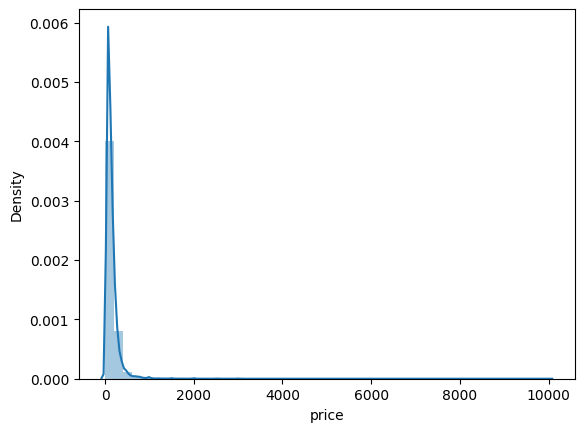

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

display(pd.DataFrame(df['price'].describe()))
sns.distplot(df['price']);

In [17]:
categorical_list

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [18]:
# sample col eda
eda_df1 = df.groupby('neighbourhood_group')['price'].agg(price_mean =('mean')).reset_index()
eda_df1

,neighbourhood_group,price_mean
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


### Feature Engineering

**Numerical features**

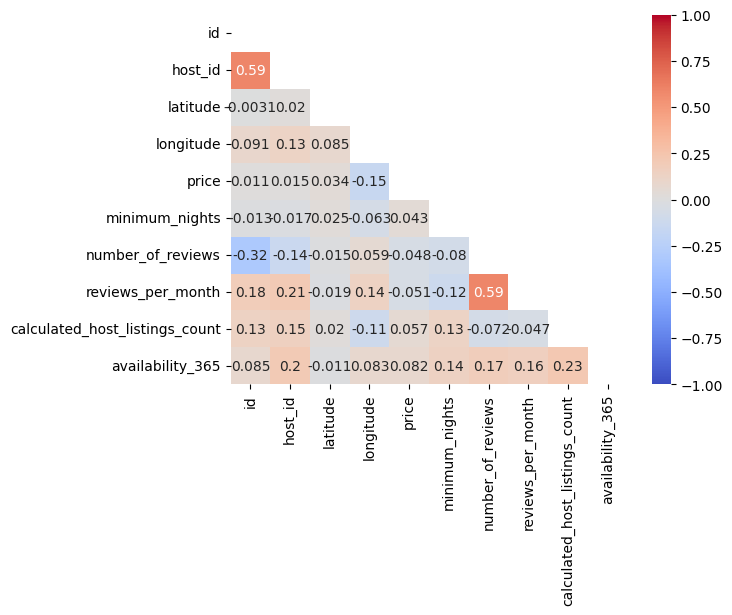

In [19]:
# heatmap plot
import seaborn as sns
# every relationship
df_pair = df[numerical_list]
mask = np.triu(np.ones_like(df_pair.corr(), dtype=np.bool_))
sns.heatmap(df_pair.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = mask)
plt.show()

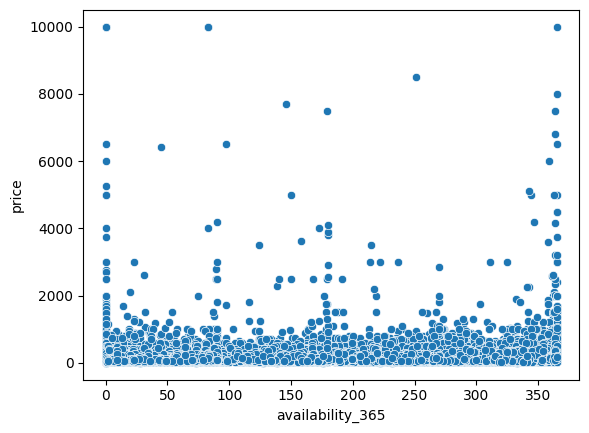

In [20]:
# scatter plot(Followers & Followers_gained)
sns.scatterplot(data = df, x='availability_365', y='price')
plt.show()

In [21]:
# divide continuous variable into 3 groups
df['grouped_var'] = pd.cut(df['availability_365'], 3, labels=['Low', 'Medium', 'High'])
#add mean vals
mean_values = df.groupby('grouped_var')['price'].mean()
print(mean_values)

grouped_var
Low       138.958384
Medium    165.994545
High      181.618214
Name: price, dtype: float64


**Categorical features**

In [22]:
df[categorical_list].head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


,neighbourhood_group,mean
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


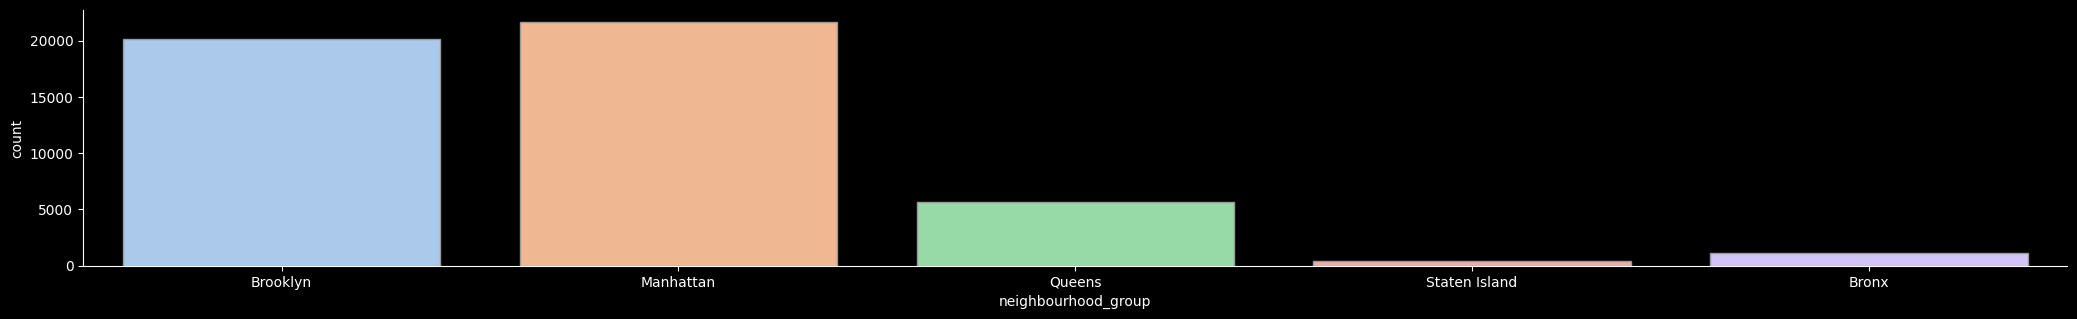

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="neighbourhood_group", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)

eda_df = df.groupby('neighbourhood_group')['price'].agg(mean =('mean')).reset_index()
display(eda_df)

**Modeling Process**

**Data Preparation**

In [23]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,grouped_var
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,High


In [24]:
# Feature(X)와 Target(Y)
from sklearn.model_selection import train_test_split

X = df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price', 'last_review', 'grouped_var'], axis=1)
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(34226, 8)
(34226,)
(14669, 8)
(14669,)


In [25]:
from sklearn.preprocessing import LabelEncoder

categorical_list = ['neighbourhood_group', 'neighbourhood', 'room_type']

for col in categorical_list :
  encoder = LabelEncoder()
  encoder.fit(x_train[[col]])

  x_train[col] = encoder.transform(x_train[col])
  x_test[col] = encoder.transform(x_test[col])

In [26]:
x_train.head(2)

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
39351,2,198,1,1,53,7.64,3,2
26399,0,213,1,1,70,3.55,1,283


In [27]:
x_test.head(2)

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
36514,0,111,1,2,0,0.0,4,364
48599,1,214,1,3,0,0.0,1,7


**Model Training**

In [28]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rfc = RandomForestRegressor()
rfc.fit(x_train, y_train)

# Predict & check performance
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(metrics.r2_score(y_train, y_pred_train))
print(metrics.r2_score(y_test, y_pred_test))

0.801192924483494
0.03827005968053965


In [29]:
# Overfitting Issue
# Reducing the performance gap between the Train and Test sets as much as possible helps prevent overfitting.
from sklearn.metrics import roc_auc_score

print("[Train]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

[Train]
Mean Absolute Error: 31.295506950910745
Mean Squared Error: 13211.66118687918
Root Mean Squared Error: 114.94199052948048
------------------------------------------
[Test]
Mean Absolute Error: 68.7527902124746
Mean Squared Error: 35750.28173706006
Root Mean Squared Error: 189.07744904419474


**Hyperparameter Tuning**

In [30]:
# BayesianOptimization
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score


def model_evaluate(n_estimators, maxDepth):
    clf = RandomForestRegressor(
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='r2')
    return np.mean(scores)


def bayesOpt(x_train, y_train):
    clfBO = BayesianOptimization(model_evaluate, {'n_estimators':  (100, 300),
                                                  'maxDepth': (2, 8)
                                                 })
    clfBO.maximize(init_points=5, n_iter=10)
    print(clfBO.res)

bayesOpt(x_train, y_train)

|   iter    |  target   | maxDepth  | n_esti... |
-------------------------------------------------
| 1         | 0.1289    | 7.779     | 210.8     |
| 2         | 0.07625   | 2.5       | 132.6     |
| 3         | 0.086     | 4.692     | 210.7     |
| 4         | 0.07683   | 2.406     | 100.7     |
| 5         | 0.07654   | 2.25      | 271.0     |
| 6         | 0.1322    | 6.249     | 232.8     |
| 7         | 0.0761    | 2.945     | 215.0     |
| 8         | 0.1392    | 7.632     | 210.8     |
| 9         | 0.1297    | 7.276     | 210.4     |
| 10        | 0.1352    | 7.125     | 211.3     |
| 11        | 0.1303    | 6.956     | 233.4     |
| 12        | 0.1313    | 6.082     | 233.8     |
| 13        | 0.1135    | 5.265     | 233.2     |
| 14        | 0.1313    | 7.25      | 232.3     |
| 15        | 0.1332    | 6.089     | 231.6     |
[{'target': 0.12890554366506288, 'params': {'maxDepth': 7.7789780613282815, 'n_estimators': 210.82670785982177}}, {'target': 0.0762525591811154, 'para

In [31]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rfc = RandomForestRegressor(max_depth = 8, n_estimators = 100)
rfc.fit(x_train, y_train)

# Predict & check performance
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(metrics.r2_score(y_train, y_pred_train))
print(metrics.r2_score(y_test, y_pred_test))

print("[Train]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('------------------------------------------')
print("[Test]")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

0.44262545589634505
0.1748942218113052
[Train]
Mean Absolute Error: 65.26515922867263
Mean Squared Error: 37040.148655460456
Root Mean Squared Error: 192.45817378189074
------------------------------------------
[Test]
Mean Absolute Error: 67.15927604212936
Mean Squared Error: 30671.566722071348
Root Mean Squared Error: 175.1329972394447


### Summary

In [32]:
plt.style.use('default')

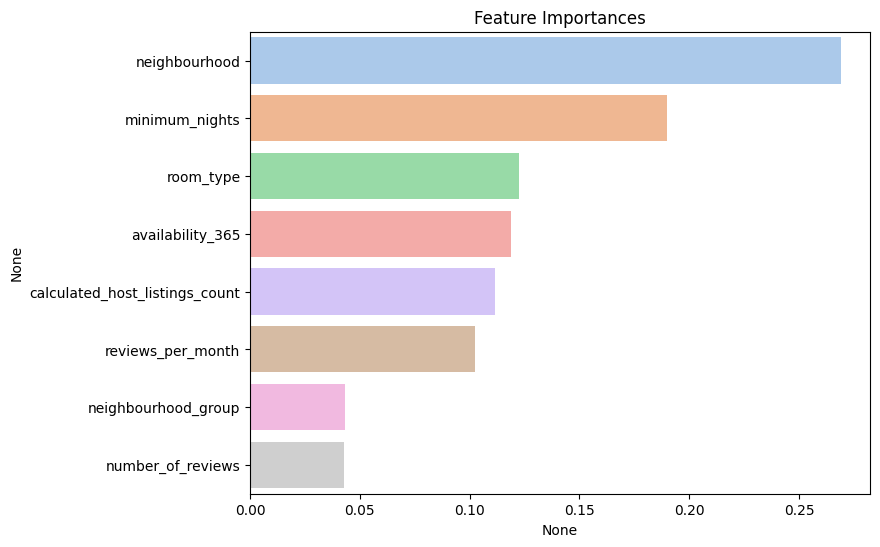

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rfc.feature_importances_ 
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(
    x=ftr_top20,
    y=ftr_top20.index,
    palette=sns.color_palette("pastel", len(ftr_top20))
)
plt.show()

Saving figure predicted_vs_actual


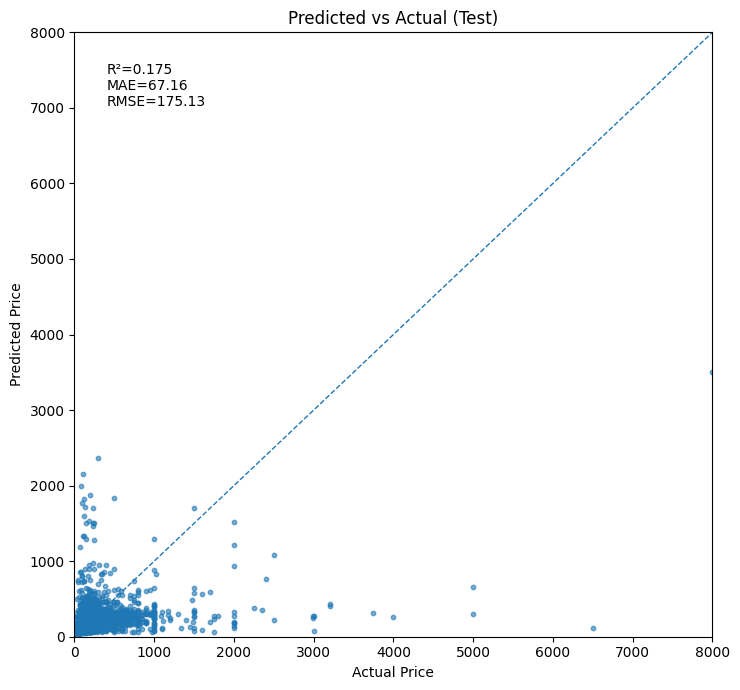

In [34]:
plt.figure(figsize=(7.5,7))
plt.scatter(y_test, y_pred_test, s=10, alpha=0.6)
lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
plt.plot(lims, lims, linewidth=1, linestyle='--')
plt.xlim(lims); plt.ylim(lims)
plt.xlabel('Actual Price'); plt.ylabel('Predicted Price'); plt.title('Predicted vs Actual (Test)')

text = f"R²={metrics.r2_score(y_test, y_pred_test):.3f}\nMAE={metrics.mean_absolute_error(y_test, y_pred_test):.2f}\nRMSE={np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)):.2f}"
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes, va='top')


save_fig('predicted_vs_actual')
plt.show()

Saving figure price_hexbin


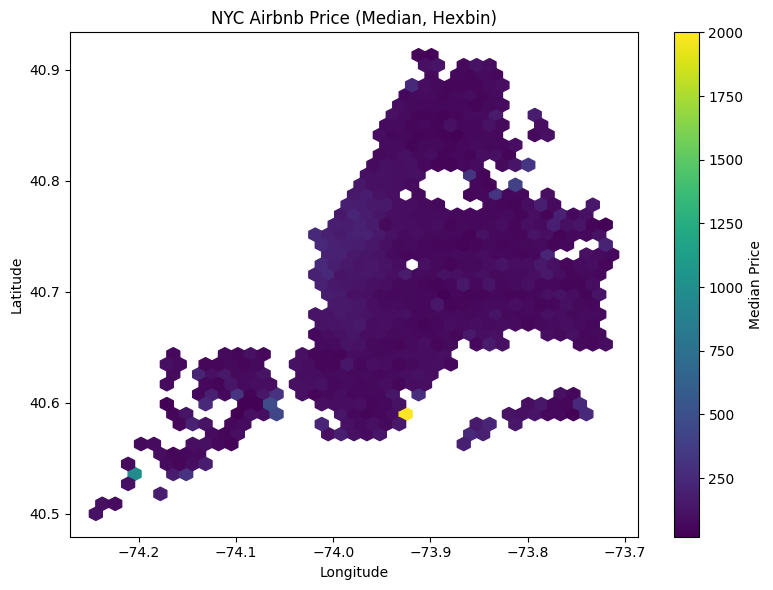

In [35]:
plt.figure(figsize=(8,6))
hb = plt.hexbin(df['longitude'], df['latitude'],
                C=df['price'], gridsize=40,
                reduce_C_function=np.median)
plt.colorbar(hb, label='Median Price')
plt.xlabel('Longitude'); plt.ylabel('Latitude'); plt.title('NYC Airbnb Price (Median, Hexbin)')

save_fig('price_hexbin')
plt.show()